In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=17_Sjt34OpKeiyQdBRzd4BeuLZuvU0z7z' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=17_Sjt34OpKeiyQdBRzd4BeuLZuvU0z7z" -O train1.zip && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=11fUcXHndS2kmc9ACei5Yz8lZ3fQ-tnOU' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=11fUcXHndS2kmc9ACei5Yz8lZ3fQ-tnOU" -O feature_train1.zip && rm -rf /tmp/cookies.txt
!unzip train1.zip
!unzip feature_train1.zip
import os
import shutil
subjects=os.listdir("/content/train")
for i in subjects:
    path1=os.path.join("/content/train",os.path.join(i,'thr'))
    path2=os.path.join("/content/train",os.path.join(i,'wav'))
    shutil.rmtree(path1,ignore_errors=True)
    shutil.rmtree(path2,ignore_errors=True)

Streaming output truncated to the last 5000 lines.
  inflating: train/sub_10/wav/10_1_2_3_110_1.wav  
  inflating: train/sub_10/wav/10_1_2_6_5_1.wav  
  inflating: train/sub_10/wav/10_2_2_3_287_1.wav  
  inflating: train/sub_10/wav/10_1_2_5_425_1.wav  
  inflating: train/sub_10/wav/10_2_2_7_1070_1.wav  
  inflating: train/sub_10/wav/10_1_2_6_102_1.wav  
  inflating: train/sub_10/wav/10_2_2_4_1209_1.wav  
  inflating: train/sub_10/wav/10_2_2_8_880_1.wav  
  inflating: train/sub_10/wav/10_1_2_1_1020_1.wav  
  inflating: train/sub_10/wav/10_1_2_8_299_1.wav  
  inflating: train/sub_10/wav/10_2_2_6_331_1.wav  
  inflating: train/sub_10/wav/10_1_2_4_1187_1.wav  
  inflating: train/sub_10/wav/10_1_2_2_933_1.wav  
  inflating: train/sub_10/wav/10_1_2_2_1165_1.wav  
  inflating: train/sub_10/wav/10_1_2_5_23_1.wav  
  inflating: train/sub_10/wav/10_2_2_1_581_1.wav  
  inflating: train/sub_10/wav/10_2_2_7_408_1.wav  
  inflating: train/sub_10/wav/10_1_2_1_414_1.wav  
  inflating: train/sub_10/wav

In [ ]:
import numpy as np
import cv2 as cv

In [ ]:
import tensorflow as tf
Train1=tf.keras.utils.image_dataset_from_directory('/content/train',
    color_mode='grayscale',
    batch_size=32,
    image_size=(128, 128),
    crop_to_aspect_ratio=True,
    shuffle=False,
)

Found 1882 files belonging to 20 classes.


In [ ]:
Train2=tf.keras.utils.image_dataset_from_directory('/content/content/feature_train',
    color_mode='grayscale',
    batch_size=32,
    image_size=(128, 128),
    crop_to_aspect_ratio=True,
    shuffle=False,
)

Found 1882 files belonging to 21 classes.


In [ ]:
#img,label,feature,label


In [ ]:
Train=tf.data.Dataset.zip((Train1,Train2))#img,label,feature,label

In [ ]:
def mapingFunc(d1,d2):
    print(d2[0])
    return (((d1[0],d2[0])),d1[1])#(img,feature),label

In [ ]:
Train=Train.map(mapingFunc)

Tensor("args_2:0", shape=(None, 128, 128, 1), dtype=float32)


tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(32,), dtype=int32)
tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(32,), dtype=int32)
tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1], shape=(32,), dtype=int32)
tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2], shape=(32,), dtype=int32)
tf.Tensor([2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2], shape=(32,), dtype=int32)
tf.Tensor([2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2], shape=(32,), dtype=int32)
tf.Tensor([2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3], shape=(32,), dtype=int32)
tf.Tensor([3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

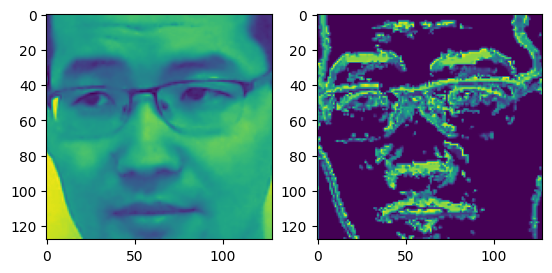

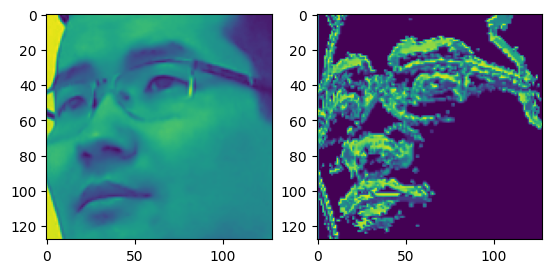

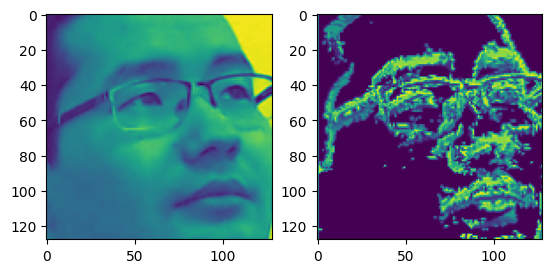

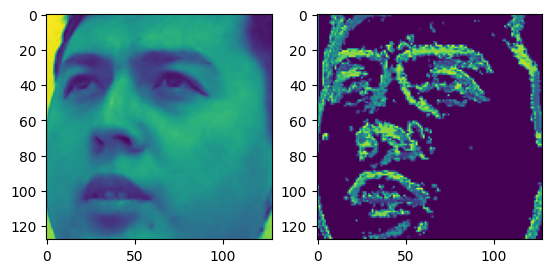

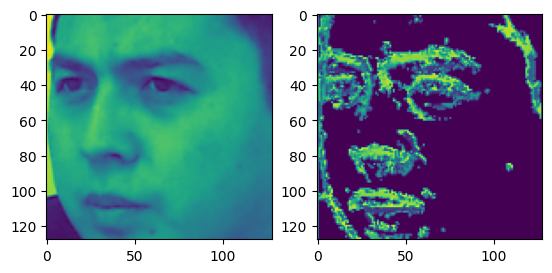

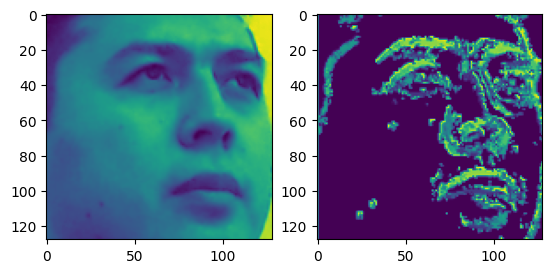

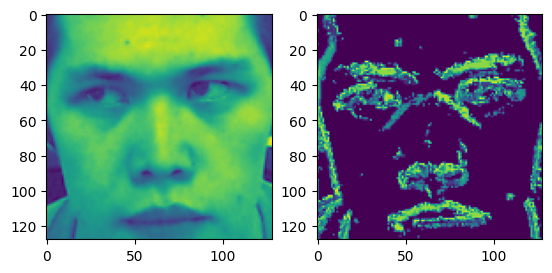

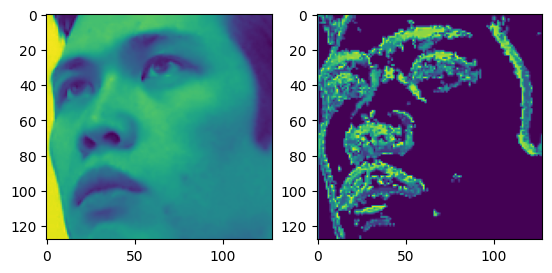

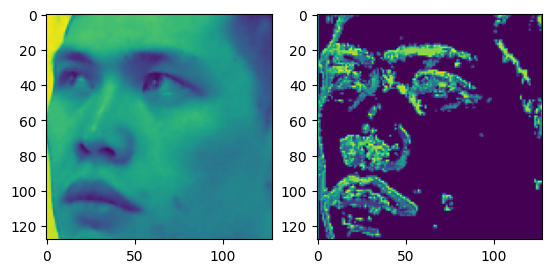

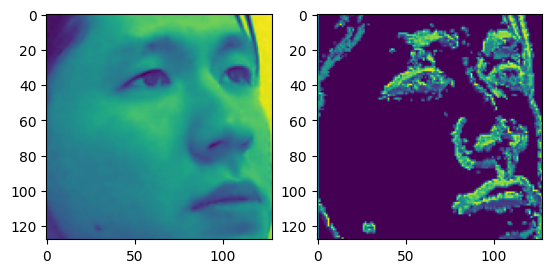

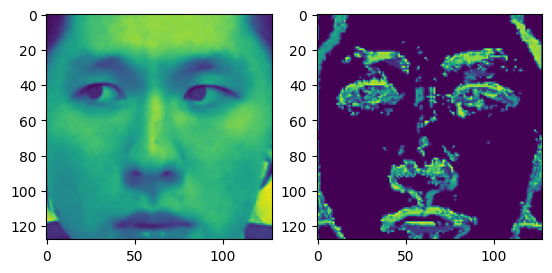

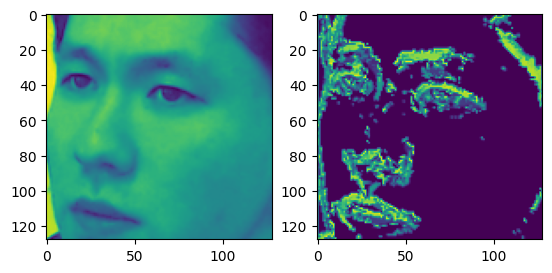

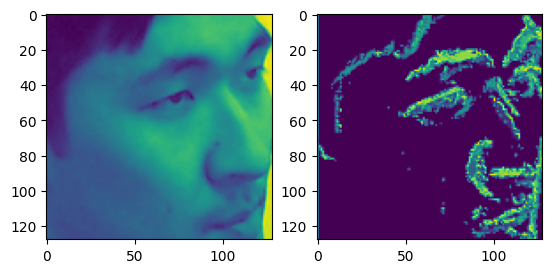

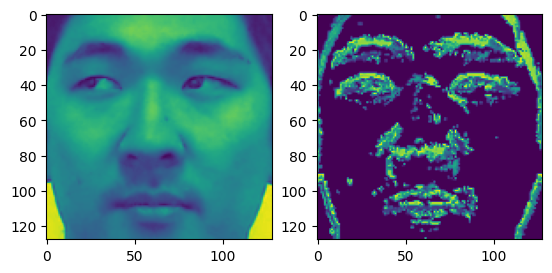

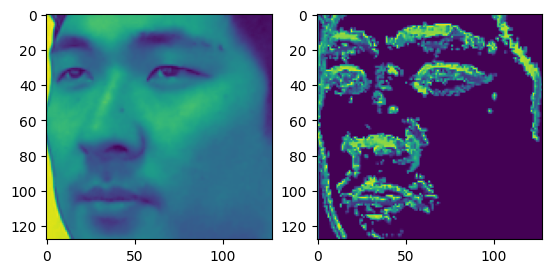

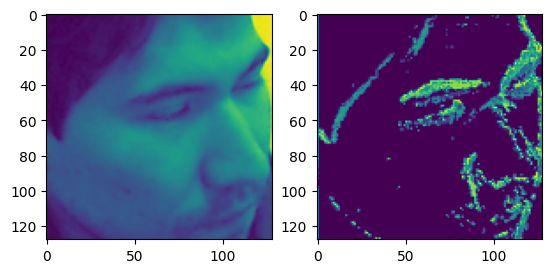

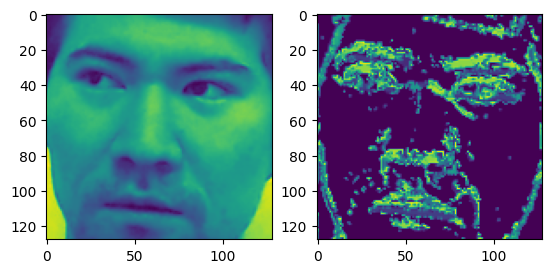

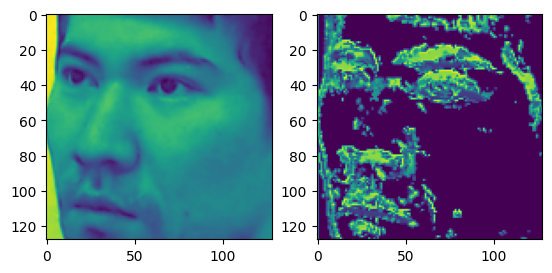

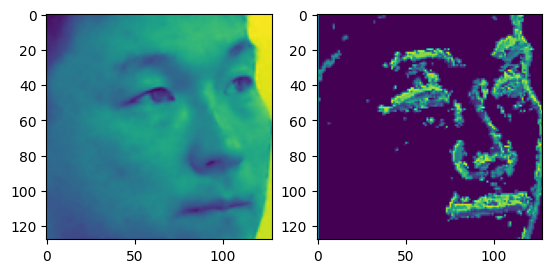

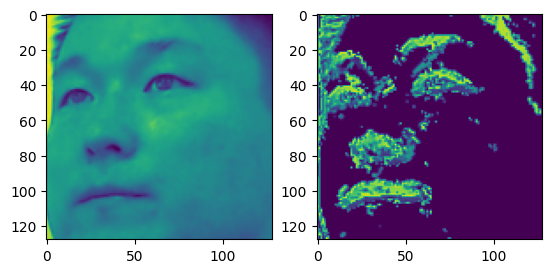

In [ ]:
import matplotlib.pyplot as plt
for (img,feature),label in Train.take(20):
    num=8
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(img[num])
    plt.subplot(1,2,2)
    plt.imshow(feature[num])
    print(label)


In [ ]:
Train.element_spec

((TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name=None)),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [ ]:
IMG_WIDTH=128
IMG_HEIGHT=128
IMG_CHANNELS=1
N=20

In [ ]:
import tensorflow as tf
class Summation(tf.keras.layers.Layer):
    def __init__(self,**kwargs):    
        # self.output_dim =output
        super(Summation, self).__init__(**kwargs)
    def build(self, input_shape): 
        # self.kernel = self.add_weight(name = 'kernel', 
        #     shape = (input_shape[1], input_shape[-1]), 
        #     initializer = 'normal', trainable = False) 
        super(Summation, self).build(input_shape)
    def call(self, input1,input2,input3): 
        return (input1+input2+input3)/3

In [ ]:
class sharedConvLayers(tf.keras.Model):
  def __init__(self):
    super(sharedConvLayers, self).__init__(name='')
    self.conv1=tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same')
    self.conv2=tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same')
    self.max1=tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))

    self.conv3=tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')
    self.conv4=tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')
    self.max2=tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))

    self.conv5=tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same')
    self.conv6=tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same')
    self.max3=tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))

    self.conv7=tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same')
    self.conv8=tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same')
    self.conv9=tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same')
    self.flatten=tf.keras.layers.Flatten()

  def call(self, input):
    x=self.conv1(input)
    x=self.conv2(x)
    x=self.max1(x)
    x=self.conv3(x)
    x=self.conv4(x)
    x=self.max2(x)
    x=self.conv5(x)
    x=self.conv6(x)
    x=self.max3(x)
    x=self.conv7(x)
    x=self.conv8(x)
    x=self.conv9(x)
    x=self.flatten(x)
    return x



In [ ]:
input1=tf.keras.layers.Input((IMG_WIDTH,IMG_HEIGHT,IMG_CHANNELS))
input1=tf.keras.layers.Lambda(lambda x:x/255)(input1)#normalization
input2=tf.keras.layers.Input((IMG_WIDTH,IMG_HEIGHT,IMG_CHANNELS))
input2=tf.keras.layers.Lambda(lambda x:x/255)(input2)
shared_conv=sharedConvLayers()
feature1=shared_conv(input1)
feature2=shared_conv(input2)

#Concatenation Fusion Layer
yconcate=tf.keras.layers.Concatenate()([feature1,feature2])
wconcate=tf.keras.layers.Dense(1000,activation='relu')(yconcate)
wconcate=tf.keras.layers.Dense(1000,activation='relu')(wconcate)
sconcate=tf.keras.layers.Dense(N,activation='sigmoid')(wconcate)

# #Average Fusion Layer
yavg=tf.keras.layers.Average()([feature1,feature2])
wavg=tf.keras.layers.Dense(1000,activation='relu')(yavg)
wavg=tf.keras.layers.Dense(1000,activation='relu')(wavg)
savg=tf.keras.layers.Dense(N,activation='sigmoid')(wavg)

# #Max Fusion Layer
ymax=tf.keras.layers.Maximum()([feature1,feature2])
wmax=tf.keras.layers.Dense(1000,activation='relu')(ymax)
wmax=tf.keras.layers.Dense(1000,activation='relu')(wmax)
smax=tf.keras.layers.Dense(N,activation='sigmoid')(wmax)

# out=tf.keras.layers.Lambda(lambda x,y,z: x+y+z)(sconcate,savg,smax)
# out=Summation()(sconcate,savg,smax)
model = tf.keras.Model(inputs=[input1,input2], outputs=[sconcate,savg,smax])
# model = tf.keras.Model(inputs=[input1,input2], outputs=[out])


In [ ]:
# opt = tf.keras.optimizers.SGD(0.01,momentum=0.06,weight_decay=10e-3)
# opt = tf.keras.optimizers.Adam(0.01)
# opt=tf.keras.optimizers.SGD(0.001,momentum=0.0009)
opt=tf.keras.optimizers.SGD(0.001,momentum=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_4 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
  (sharedConvLayers)            (None, 131072)       7110592     ['input_3[0][0]',                
                                                                  'input_4[0][0]']            

In [ ]:
model.fit(Train,epochs=80)

Epoch 1/80
59/59 [==============================] - 45s 427ms/step - loss: 8.5808 - dense_2_loss: 2.8606 - dense_5_loss: 2.8629 - dense_8_loss: 2.8573 - dense_2_accuracy: 0.2221 - dense_5_accuracy: 0.1467 - dense_8_accuracy: 0.1902
Epoch 2/80
59/59 [==============================] - 19s 312ms/step - loss: 8.7947 - dense_2_loss: 2.8922 - dense_5_loss: 2.9757 - dense_8_loss: 2.9268 - dense_2_accuracy: 0.1111 - dense_5_accuracy: 0.0776 - dense_8_accuracy: 0.1079
Epoch 3/80
59/59 [==============================] - 19s 322ms/step - loss: 8.6892 - dense_2_loss: 2.8536 - dense_5_loss: 2.9499 - dense_8_loss: 2.8857 - dense_2_accuracy: 0.1222 - dense_5_accuracy: 0.0999 - dense_8_accuracy: 0.1254
Epoch 4/80
59/59 [==============================] - 19s 319ms/step - loss: 8.8311 - dense_2_loss: 2.9039 - dense_5_loss: 2.9959 - dense_8_loss: 2.9313 - dense_2_accuracy: 0.0685 - dense_5_accuracy: 0.0436 - dense_8_accuracy: 0.0515
Epoch 5/80
59/59 [==============================] - 19s 314ms/step - los

In [ ]:
model.save('facemodel')

In [ ]:
!zip -r facemodel /content/facemodel

  adding: content/facemodel/ (stored 0%)
  adding: content/facemodel/saved_model.pb (deflated 89%)
  adding: content/facemodel/keras_metadata.pb (deflated 93%)
  adding: content/facemodel/assets/ (stored 0%)
  adding: content/facemodel/variables/ (stored 0%)
  adding: content/facemodel/variables/variables.data-00000-of-00001 (deflated 19%)
  adding: content/facemodel/variables/variables.index (deflated 70%)
  adding: content/facemodel/fingerprint.pb (stored 0%)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
!cp -r /content/facemodel.zip '/content/gdrive/MyDrive/BM/BM Face Model'
!ls -lt '/content/gdrive/MyDrive/BM/BM Face Model' 

total 4719525
-rw------- 1 root root 3463701752 Apr 12 10:10 facemodel.zip
-rw------- 1 root root 1369091076 Apr 12 08:44 savedfacemodel.zip


In [ ]:
#face + face feature
#thermal + thermal feature
#sound + sound feature/ sound feature +sound feature
#face+thermal feature
#thermal +face feature
#face +thermal
